<a href="https://colab.research.google.com/github/MxD-lab/SNN_Simulation/blob/xor/prexor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy 

min:4パルス/msec
max:50パルス/mseで正規化

In [6]:
def nomalization(x):
  y= (54-x)/46

  return y


In [7]:
def relu(x,n,a):
  """
  ReLU関数
  x:入力,
  n:x切片,
  a:傾き

  """
  y = a*(x-n)
  out = np.maximum(y,0)
  
  return out


In [8]:
def AND(x1,x2):

  # ゼロ初期化
  out=np.zeros(1000, dtype=float)
  



  # 重み/バイアス パラメータ
  w_1= 0.5
  w_2= 0.5
  b = -0.7

  # 要素数チェック
  if len(x1) != len(x2):
    raise Exception("x1 and x2 len does not match!")

  # 各フレームのノード出力値計算
  for i in range(len(x1)):

    

    out[i] = x1[i]*w_1 + x2[i]*w_2 + b

    nomalization(out[i])

    if out[i] <= 0:
      out[i]=0

    else:
      out[i] = 1
 
    
  return out


In [9]:
def OR(x1,x2):
  # ゼロ初期化
  out=np.zeros(1000, dtype=float)

  # 重み/バイアス パラメータ
  w_1= 0.5
  w_2= 0.5
  b = -0.2

  # 要素数チェック
  if len(x1) != len(x2):
    raise Exception("x1 and x2 len does not match!")

  # 各フレームのノード出力値計算
  for i in range(len(x1)):
    out[i] = x1[i]*w_1 + x2[i]*w_2 + b

    nomalization(out[i])

    if out[i] <= 0:
      out[i]=0

    else:
       out[i] = 1

  return out




In [10]:
def NAND(x1,x2):
  # ゼロ初期化
  out=np.zeros(1000, dtype=float)

  # 重み/バイアス パラメータ
  w_1= -0.5
  w_2= -0.5
  b = 0.7

  # 要素数チェック
  if len(x1) != len(x2):
    raise Exception("x1 and x2 len does not match!")

  # 各フレームのノード出力値計算
  for i in range(len(x1)):
    out[i] = x1[i]*w_1 + x2[i]*w_2 + b

    nomalization(out[i])

    if out[i] <= 0:
      out[i]=0

    else:
       out[i] = 1


  return out


In [11]:
def XOR(x1,x2):
  
  s1 = NAND(x1,x2)
  s2 = OR(x1,x2)
  out = AND(s1,s2)


 # 各フレームのノード出力値計算
  for i in range(len(x1)):

    nomalization(out[i])


    if out[i] <= 0:
      out[i]=0

    else:
       out[i] = 1


  return out

In [29]:
# シミュレーションの入力端子のジェネレーターのパルスの密度関数　単位はpulse/msec　（Hz）
simulation_time = 1000 #1000秒 1サイクル1nanosec
a_dens_array = [4if (i > 250 and i < 500) or (i > 750 and i < 1000) else 0 for i in range(1000)]
b_dens_array = [4if (i > 500 and i < 1000) else 0 for i in range(1000)]

# density情報からパルス数を生成 256μ
dt=0.256
a_pulse_cnt = numpy.multiply(a_dens_array , dt)
b_pulse_cnt =  numpy.multiply(b_dens_array , dt)

出力は
縦軸：パルス/秒
横軸：秒

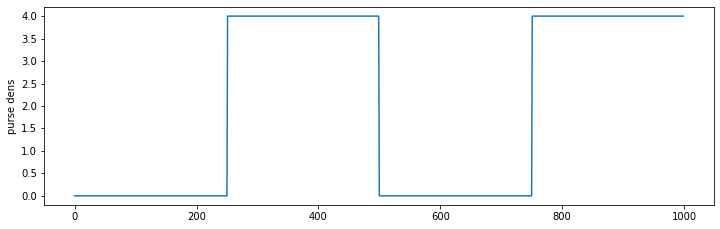

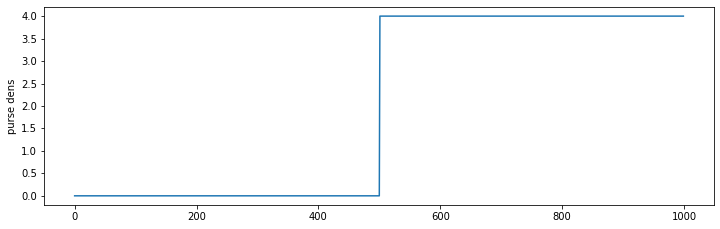

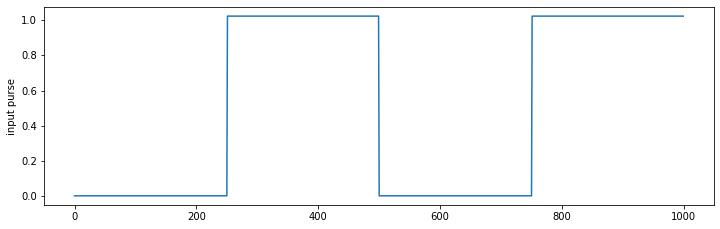

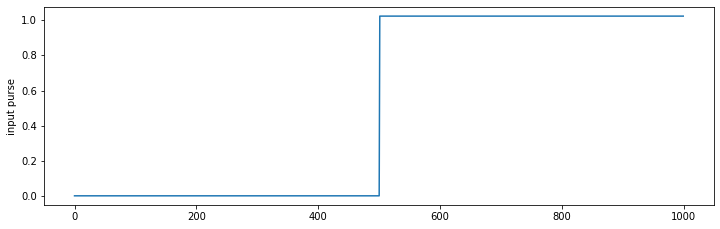

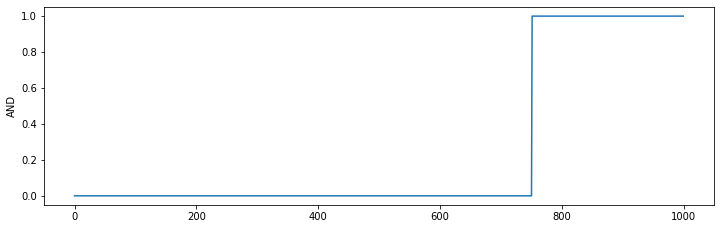

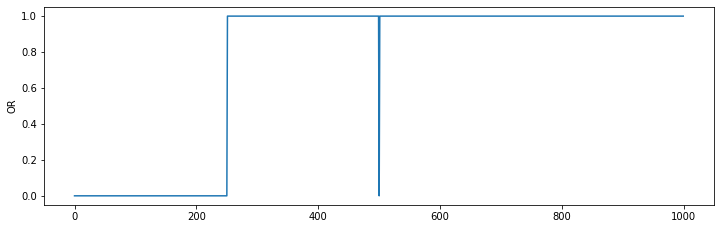

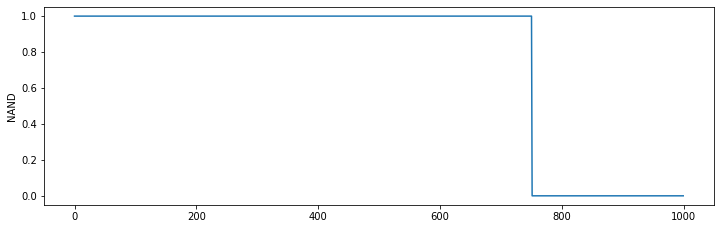

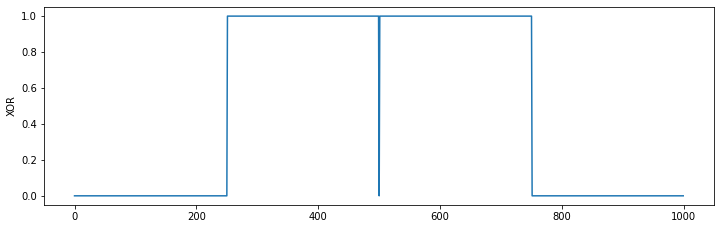

In [30]:
and_result = AND(a_pulse_cnt, b_pulse_cnt)
nand_result = NAND(a_pulse_cnt, b_pulse_cnt)
or_result = OR(a_pulse_cnt, b_pulse_cnt)
xor_result = XOR(a_pulse_cnt, b_pulse_cnt)

# 結果描画

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.ylabel('purse dens')
plt.plot(a_dens_array)
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.ylabel('purse dens')
plt.plot(b_dens_array)
plt.show()


plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.ylabel('input purse')
plt.plot(a_pulse_cnt)
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.ylabel('input purse')
plt.plot(b_pulse_cnt)
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.ylabel('AND')
plt.plot(and_result)
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.ylabel('OR')
plt.plot(or_result)
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.ylabel('NAND')
plt.plot(nand_result)
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.ylabel('XOR')
plt.plot(xor_result)
plt.show()